In [1]:
import sys
import os

# Append the directory of clean_cresci_2015.py to sys.path
sys.path.append(os.path.abspath("../Code"))

from import_data import ImportData

In [2]:
# Import the data 
importer = ImportData()
data = importer.read_and_sample_data(bot_ratio=[.4, .6])

In [3]:
# View the data
data

,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,num_tweets,retweet_ratio,reply_ration,statuses_count,followers_count,friends_count,favourites_count,listed_count,account_age_years,followers_to_friends_ratio,bot
0,0.002622,0.011000,0.004438,0.105945,0.052539,0.077628,0.208747,0.000302,0.041263,0.014027,0.004002,0.010793,0.002130,0.002632,0.285714,0.001365,0
1,0.083226,0.020705,0.004438,0.162258,0.136636,0.528721,0.567773,0.003530,0.028570,0.138374,0.018905,0.019402,0.018334,0.027632,0.428571,0.003593,0
2,0.012462,0.002265,0.000153,0.004636,0.002997,0.003023,0.013648,0.021746,0.128576,0.000819,0.001372,0.003402,0.000387,0.001316,0.571429,0.001472,0
3,0.004457,0.006147,0.001836,0.143305,0.097320,0.057443,0.144076,0.000744,0.033398,0.009093,0.008881,0.014405,0.001743,0.003947,0.142857,0.002272,0
4,0.000359,0.000000,0.000000,0.002727,0.002468,0.000889,0.003102,0.002655,0.000000,0.000196,0.000419,0.002436,0.000065,0.000000,0.285714,0.000625,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,0.000982,0.001802,0.000001,0.004267,0.000000,0.000500,0.031594,0.023140,0.006265,0.027919,0.191781,0.199199,0.000000,0.000000,0.250000,0.219849,1
1159,0.000000,0.003636,0.000000,0.034483,0.000000,0.000000,0.576923,0.000000,0.003333,0.685714,0.111111,0.727891,0.000000,0.000000,0.000000,0.114226,1
1160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230769,0.000000,0.000000,0.428571,0.481481,0.717687,0.000000,0.000000,0.000000,0.502019,1
1161,0.000000,0.000000,0.000000,0.172414,0.000000,0.000000,0.269231,0.000000,0.000000,0.457143,0.407407,0.884354,0.000000,0.000000,0.000000,0.344729,1


# Feature Selection

In [75]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Correlation

In [38]:
# Correlation Analysis 
values = pd.DataFrame(data.corr()["bot"].abs().sort_values(ascending=False)[1:])
values.reset_index(inplace=True)

# Rename the columns to 'feature' and 'correlation'
values.columns = ['feature', 'correlation']
values

,feature,correlation
0,friends_count,0.658920
1,followers_to_friends_ratio,0.646929
2,followers_count,0.584784
3,account_age_years,0.461585
4,reply_ration,0.447043
5,statuses_count,0.395193
6,num_mentions,0.208334
7,num_urls,0.185216
8,reply_count,0.138196
9,favorite_count,0.136783


In [39]:
# View the order of features as a list
list_values = list(values.feature[1:])
list_values

['followers_to_friends_ratio',
 'followers_count',
 'account_age_years',
 'reply_ration',
 'statuses_count',
 'num_mentions',
 'num_urls',
 'reply_count',
 'favorite_count',
 'listed_count',
 'retweet_ratio',
 'num_hashtags',
 'retweet_count',
 'favourites_count',
 'num_tweets']

SelectKbest - chi2

In [26]:
# Now we are going to use the SKB feature selection
# First we need to separate the DF on X, y
X = data.drop("bot", axis=1)
y = data["bot"]

# Initialise the SelectKBest, for this case we will use the chi2
skb =  SelectKBest(score_func=chi2, k="all")

# Fit the SelectKBest
skb_chi2 = skb.fit(X, y)

# Get the features in a data fram
feat_imp_skb_chi2 = pd.DataFrame(
    {'feature': X.columns[skb_chi2.get_support()].values,
     'importance': skb_chi2.scores_
     }
     )

# See results
feat_imp_skb_chi2 = feat_imp_skb_chi2.sort_values('importance', ascending=False)
feat_imp_skb_chi2

,feature,importance
11,friends_count,166.032844
15,followers_to_friends_ratio,112.278984
10,followers_count,85.004459
9,statuses_count,72.708228
8,reply_ration,54.697071
14,account_age_years,45.340157
2,favorite_count,17.531629
5,num_mentions,13.414834
4,num_urls,8.455355
13,listed_count,7.763641


In [36]:
# View the order of features as a list
list_values = list(feat_imp_skb_chi2.feature.values)
list_values

['friends_count',
 'followers_to_friends_ratio',
 'followers_count',
 'statuses_count',
 'reply_ration',
 'account_age_years',
 'favorite_count',
 'num_mentions',
 'num_urls',
 'listed_count',
 'reply_count',
 'retweet_ratio',
 'retweet_count',
 'num_hashtags',
 'favourites_count',
 'num_tweets']

Mutual Info Classifier

In [46]:
# Now we will use the mutual_info_classif
skb =  SelectKBest(score_func=mutual_info_classif, k="all")

# Fit the SelectKBest
skb_mutual_info =  skb.fit(X, y)

# Get the features in a data fram
feat_imp_skb_Minf = pd.DataFrame(
    {'feature': X.columns[skb_mutual_info.get_support()].values,
     'importance': skb_mutual_info.scores_
     }
     )

# See results
feat_imp_skb_Minf = feat_imp_skb_Minf.sort_values('importance', ascending=False)
feat_imp_skb_Minf

,feature,importance
14,account_age_years,0.669597
11,friends_count,0.544894
10,followers_count,0.491227
4,num_urls,0.468595
1,reply_count,0.445064
15,followers_to_friends_ratio,0.442332
5,num_mentions,0.441905
3,num_hashtags,0.411136
2,favorite_count,0.360008
12,favourites_count,0.356941


In [47]:
# View the order of features as a list
list_values = list(feat_imp_skb_Minf.feature.values)
list_values

['account_age_years',
 'friends_count',
 'followers_count',
 'num_urls',
 'reply_count',
 'followers_to_friends_ratio',
 'num_mentions',
 'num_hashtags',
 'favorite_count',
 'favourites_count',
 'retweet_count',
 'statuses_count',
 'num_tweets',
 'retweet_ratio',
 'reply_ration',
 'listed_count']

## Create Class

In [76]:
class FeatureSelection:
    def __init__(self, data):
        """
        Initialize the feature selection object with input data.

        Args:
            data (DataFrame): Input data containing features and target variable.

        Attributes:
            data (DataFrame): Input data.
            X (DataFrame): Features.
            y (Series): Target variable.
            values (DataFrame): DataFrame containing feature importance values.
            list_values (list): List of selected feature names.
        """
        self.data = data
        self.X = data.drop("bot", axis=1)
        self.y = data["bot"]
        self.values = pd.DataFrame()
        self.list_values = []

    def select_features(self, type_selection="correlation"):
        """
        Select features based on a specified method.

        Args:
            type_selection (str): Method for feature selection. Options: "correlation", "chi2", "classifier".

        Returns:
            list: List of selected feature names.
        """
        if type_selection == "correlation":
            values, list_values = self.correlation()
            return list_values
        
        if type_selection == "chi2":
            values, list_values = self.chi2()
            return list_values
        
        if type_selection == "classifier":
            values, list_values = self.mutual_classifier()
            return list_values

    def correlation(self):
        """
        Perform correlation analysis to select features.

        Returns:
            DataFrame: DataFrame containing feature correlations.
            list: List of selected feature names.
        """
        # Correlation Analysis 
        values = pd.DataFrame(self.data.corr()["bot"].abs().sort_values(ascending=False)[1:])
        values.reset_index(inplace=True)

        # Rename the columns to 'feature' and 'correlation'
        values.columns = ['feature', 'correlation']
        self.values = values
        
        # Create a list of values
        list_values = list(values.feature)
        self.list_values = list_values

        return values, list_values
    
    def chi2(self):
        """
        Perform chi-squared test for feature selection.

        Returns:
            DataFrame: DataFrame containing feature importances.
            list: List of selected feature names.
        """
        # Initialise the SelectKBest, for this case we will use the chi2
        skb = SelectKBest(score_func=chi2, k="all")

        # Fit the SelectKBest
        skb_chi2 = skb.fit(self.X, self.y)

        # Get the features in a data frame
        feat_imp_skb_chi2 = pd.DataFrame(
            {'feature': self.X.columns[skb_chi2.get_support()].values,
            'importance': skb_chi2.scores_
            }
            )

        # sort the results in order
        values = feat_imp_skb_chi2.sort_values('importance', ascending=False)
        self.values = values

        # Create a list for the values 
        list_values = list(values.feature.values)
        self.list_values = list_values

        return values, list_values
    
    def mutual_classifier(self):
        """
        Perform mutual information for feature selection.

        Returns:
            DataFrame: DataFrame containing feature importances.
            list: List of selected feature names.
        """
        # Now we will use the mutual_info_classif
        skb = SelectKBest(score_func=mutual_info_classif, k="all")

        # Fit the SelectKBest
        skb_mutual_info = skb.fit(self.X, self.y)

        # Get the features in a data frame
        feat_imp_skb_Minf = pd.DataFrame(
            {'feature': self.X.columns[skb_mutual_info.get_support()].values,
            'importance': skb_mutual_info.scores_
            }
            )

        # See results
        values = feat_imp_skb_Minf.sort_values('importance', ascending=False)
        self.values = values

        # Create a list for the values 
        list_values = list(values.feature.values)
        self.list_values = list_values

        return values, list_values

    def pair_plot(self, num_feat="all"):
        """
        Plot pair plots for the selected features.

        Args:
            num_feat (int or str): Number of features to include in the pair plots. Default is 'all'.

        Returns:
            None

        Raises:
            ValueError: If num_feat is not 'all' or an integer between 1 and (number of features - 1).
        """
        # Check if num_feat is 'all' or a valid number within the range
        if num_feat == 'all':
            data = self.data
        else:
            # Validate num_feat if it is a numerical value
            if isinstance(num_feat, int) and num_feat > 0 and num_feat < len(self.list_values):
                # Use .loc instead of direct slicing with brackets for clarity and correctness
                data = self.data.loc[:, self.list_values[:num_feat] + ['bot']]
            else:
                raise ValueError(f"num_feat must be 'all' or an integer between 1 and {len(self.list_values) - 1}")
        
        # Plotting the pairplot with hue set to 'bot'
        sns.pairplot(data, hue='bot')
        
    def correlation_map(self, num_feat='all'):
        """
        Plot a heatmap of correlations among variables.

        Args:
            num_feat (int or str): Number of features to include in the correlation map. Default is 'all'.

        Returns:
            None

        Raises:
            ValueError: If num_feat is not 'all' or an integer between 1 and (number of features - 1).
        """
        # Check if num_feat is 'all' or a valid number within the range
        if num_feat == 'all':
            data = self.data
        else:
            # Validate num_feat if it is a numerical value
            if isinstance(num_feat, int) and num_feat > 0 and num_feat < len(self.list_values):
                # Use .loc instead of direct slicing with brackets for clarity and correctness
                data = self.data.loc[:, self.list_values[:num_feat] + ['bot']]
            else:
                raise ValueError(f"num_feat must be 'all' or an integer between 1 and {len(self.list_values) - 1}")
            
        # Correlation among variables
        plt.figure(figsize=(20,15))
        sns.heatmap(data.corr(), annot=True)

        
        

In [77]:
# Instantiate the class with the data
selection = FeatureSelection(data)

# Analyse the feature importance by desired function
selection.mutual_classifier()

(                       feature  importance
 14           account_age_years    0.669597
 11               friends_count    0.544890
 10             followers_count    0.491735
 4                     num_urls    0.474350
 1                  reply_count    0.446224
 15  followers_to_friends_ratio    0.442403
 5                 num_mentions    0.441833
 3                 num_hashtags    0.409400
 2               favorite_count    0.363320
 12            favourites_count    0.353086
 0                retweet_count    0.314184
 9               statuses_count    0.303146
 13                listed_count    0.301439
 7                retweet_ratio    0.282240
 6                   num_tweets    0.279361
 8                 reply_ration    0.273309,
 ['account_age_years',
  'friends_count',
  'followers_count',
  'num_urls',
  'reply_count',
  'followers_to_friends_ratio',
  'num_mentions',
  'num_hashtags',
  'favorite_count',
  'favourites_count',
  'retweet_count',
  'statuses_count',
  'liste

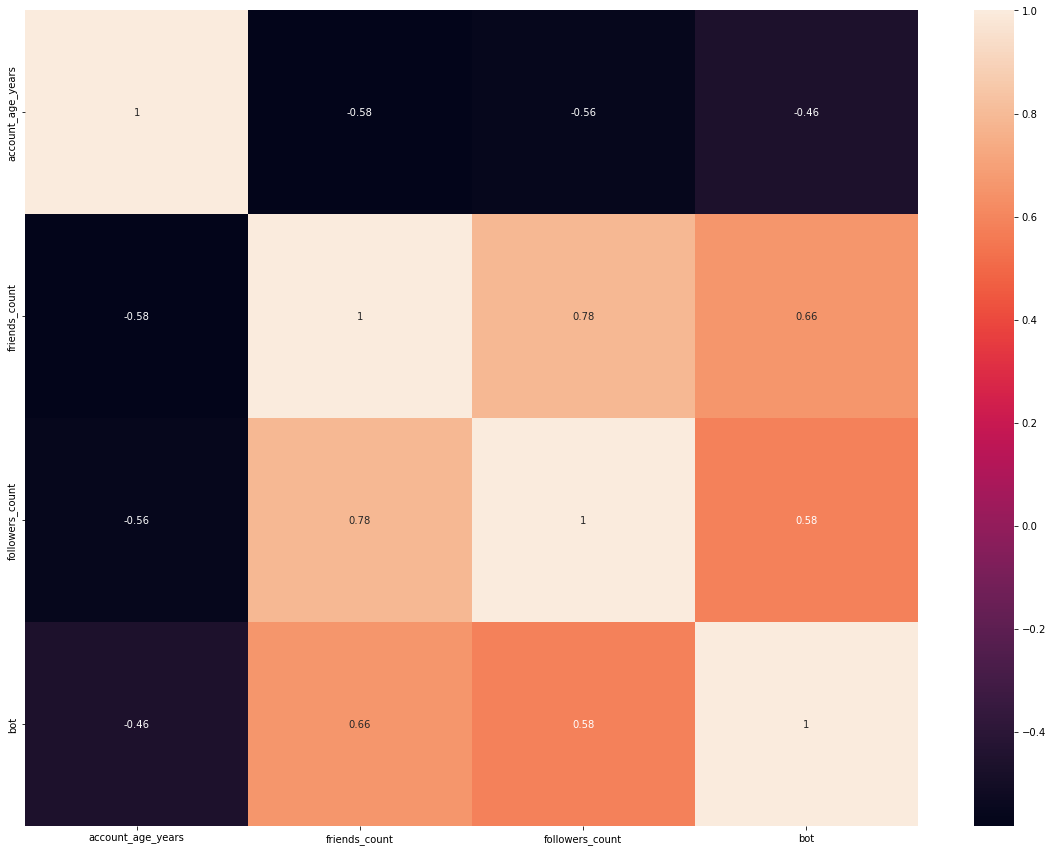

In [80]:
# Correlation matrix of a desired number of features, 3 in this case
selection.correlation_map(3)